In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Use a linear regression model to predict the number of customers each airline serves from
#its length of flight and daily flight time per plane.
#Next, build another regression model to predict the total assets of an airline from the customers served 
#by the airline. Do you have any insight about the data from the last two regression models?

In [3]:
# Import the weight file into Pandas
Data = pd.read_csv('/Users/datascience/Desktop/Data Science/Python/Airplane Cost Dataset.csv', header=0, sep=',')

# Calling the pandas data frame
df = pd.DataFrame(Data)

# Preview of Data Set
df.head()

,Airline,FlightLength,PlaneSpeed,DailyFlightTime,CustomersServed,TotalOperatingCost,Revenue,LoadFactor,AvailableCapacity,TotalAssets,Investments,AdjustedAssets
0,All-American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [4]:
# Identify the Count of missing values per column
print (df.isnull().sum())
print('Total number of missing values = ', df.isnull().sum().sum())

Airline               0
FlightLength          0
PlaneSpeed            0
DailyFlightTime       0
CustomersServed       0
TotalOperatingCost    0
Revenue               0
LoadFactor            0
AvailableCapacity     0
TotalAssets           0
Investments           0
AdjustedAssets        0
dtype: int64
Total number of missing values =  0


In [5]:
#Linear Regression to predict the number of customers each airline serves from its length of flight and daily flight time per plane.

#pulls number of customers, length of flight, and daily flight time per plane values from Airplane database
X = df[['FlightLength','DailyFlightTime']] #2 variables for multiple regression
Y = df['CustomersServed'] #response variable

X = sm.add_constant(X) # adding a constant
CustomerModel = sm.OLS(Y, X).fit() #Fitted ordinary least squares regression model
CustomerPrediction = CustomerModel.predict(X)

PrintModel = CustomerModel.summary() #display regression results
print(PrintModel)

                            OLS Regression Results                            
Dep. Variable:        CustomersServed   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.00
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.23e-06
Time:                        18:02:19   Log-Likelihood:                -330.06
No. Observations:                  31   AIC:                             666.1
Df Residuals:                      28   BIC:                             670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7792.0706   8396.998     

In [6]:
##Constant Coefficient is the Y intercept, in other words, if FlightLength and DailyFlightTime are both 0,
##then the expected output of Customers served equals -7792.0706

##Flight Length coefficient represents the change in the output of Customers Served due to a change of one unit
##in the Flight Length (if everything else was held constant). The same goes for Daily Flight Time

##P>|t| is the p-value (pvalue < 0.05 is considered statistically significant)

##Adjusted R-squared reflects the fit model (range 0 to 1). The higher value generally indicates a better fit 
## Too high of an Adjusted R-squared value raises overfitting concerns

### Linear Regression Equation to predict # of customers based on Flight Length and Daily Flight Time Per Plane
###(Customers Served) = (-7792.0706) + (183.2956)(Flight Length) - (213.3340)(Daily Flight Time Per Plane)###


In [7]:
#Assigning variables to plot with
X1=df['FlightLength']
X2=df['DailyFlightTime']

Text(0.5, 1.0, 'Customers predicted based on Flight Length')

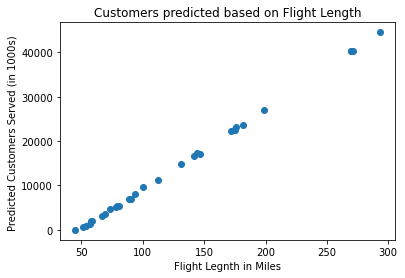

In [8]:
plt.scatter(X1, CustomerPrediction) #plots predicted customer against Flight Length
plt.xlabel("Flight Legnth in Miles")
plt.ylabel("Predicted Customers Served (in 1000s) ")
plt.title("Customers predicted based on Flight Length")

Text(0.5, 1.0, 'Customers predicted based on Daily Flight Time Per Plane')

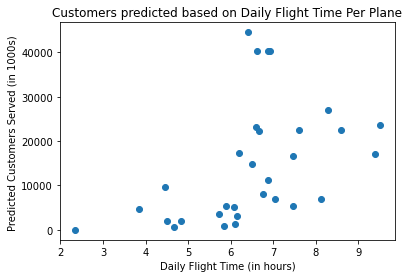

In [9]:
plt.scatter(X2, CustomerPrediction) #plots predicted customers against Daily Flight Time
plt.xlabel("Daily Flight Time (in hours)")
plt.ylabel("Predicted Customers Served (in 1000s) ")
plt.title("Customers predicted based on Daily Flight Time Per Plane")

In [10]:
#Regression model to predict the total assets of an airline from the customers served by the airline.

#pulls total assests and customers served by the airline from Airplane database
x = df['CustomersServed'] #predictor variable
y = df['TotalAssets'] #response variable

x = sm.add_constant(x) # adding a constant
AssetModel = sm.OLS(y, x).fit() #Fitted ordinary least squares regression model
TotalAssetPrediction = AssetModel.predict(x)

Printmodel = AssetModel.summary() #display regression results
print(Printmodel)


                            OLS Regression Results                            
Dep. Variable:            TotalAssets   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.85e-12
Time:                        18:02:20   Log-Likelihood:                -202.95
No. Observations:                  31   AIC:                             409.9
Df Residuals:                      29   BIC:                             412.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -98.5080     41.633     

In [11]:
##Constant Coefficient is the Y intercept, in other words, if FlightLength and DailyFlightTime are both 0,
##then the expected output of Customers served equals -7792.0706

##CustomersServed coefficient represents the change in the output of Customers Served due to a change of one unit
##in the CustomersServed (if everything else was held constant). 

##P>|t| is the p-value (pvalue < 0.05 is considered statistically significant)

##Adjusted R-squared reflects the fit model (range 0 to 1). The higher value generally indicates a better fit 
## Too high of an Adjusted R-squared value raises overfitting concerns

### Linear Regression Equation to predict # of Total Assests based on Customers Served
###(Total Assets) = (-98.5080) + (0.0217)(CustomersServed)###


Text(0.5, 1.0, 'Total Assets predicted based on Customers Served')

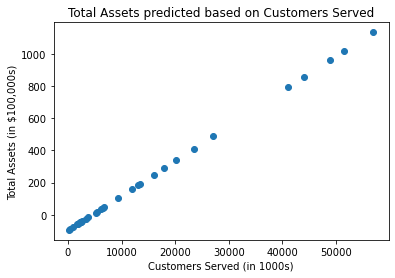

In [12]:
plt.scatter(df['CustomersServed'], TotalAssetPrediction) #plots predicted Total Assets against Customers Served
plt.xlabel("Customers Served (in 1000s)")
plt.ylabel("Total Assets (in $100,000s)")
plt.title("Total Assets predicted based on Customers Served")

In [13]:
#Based on the regression models, we can see that Flight Length and Daily Flight Time can not accurately 
#predict customers served. The adjusted R squared value is small (.595) and holds a p value greater than 0.05 for 
#daily flight time. In addition, the predicted value chart for customer served and daily flight time shows that the
#two variables are weakly correlated with eachother. 

#However, the regression model for total assets and customers served does prove to be useful in predicting assets
# based on customers served. The adjusted R squared value 0.812 with a p value of less than 0.05 
#indicating that the data is statistically significant. Moreover, the predicted asset chart 
#shows that it is strongly correlated with customers served. The equation to predict total assests from 
#customers served is as follows: (Total Assets) = (-98.5080) + (0.0217)(CustomersServed)